##Chapter_3.1

##Derivation of equation

#Kg = gas_conductance 

#Dg = diffusion_coefficient (m^2/s)

#As = area_sphere = 4 * pi * x^2 (m^2)

#Ac = area_cylinder = 2 * pi * x (m^2)




$$General Conductance Equation (gas)$$

$$Kg = \frac {Dg} {\int_{x_1}^{x_2}\ \frac {d(x)} {As(x)}}$$


##For Spherical Diffusion


Input the formula for As

$Kg = \frac {Dg} {\int_{x_1}^{x_2}\ \frac {d(x)} {4 \pi x^2}}$

Transfer the constants outside

$Kg = \frac {Dg} {\frac {1} {4 \pi} \int_{x_1}^{x_2}\ \frac {d(x)} {x^2}}$

Perform the integration

$Kg = \frac {Dg} {\frac {1} {4 \pi} \int_{x_1}^{x_2} (x^{-2}) dx}$

$Kg = \frac {Dg} {\frac {1} {4 \pi} \left (-\frac {1} {x} \bigg|_ {x_1}^{x_2} \right)}$

Simplify

$Kg = \frac {Dg} {\frac {1} {4 \pi} (-\frac {1} {x_2} + \frac {1} {x_1})}$

$Kg = \frac {Dg} {\frac {1} {4 \pi} (-\frac {x_1} {x_1 x_2} + \frac {x_2} {x_1 x_2})}$

$Kg = \frac {Dg} {\frac {1} {4 \pi} (\frac {x_2 - x_1} {x_1 x_2})}$

$Kg = \frac {Dg} {\frac {x_2 - x_1} {4 \pi x_1 x_2}}$


$$Equation for Spherical Diffusion (\frac {m^3} {s})$$  

$$Kg = \frac {Dg 4 \pi x_1 x_2} {x_2 - x_1}$$


          
          
##For Cylindrical Diffusion


Input the formula for Ac

$Kg = \frac {Dg} {\int_{x_1}^{x_2}\ \frac {d(x)} {2 \pi x}}$

Transfer the constants outside

$Kg = \frac {Dg} {\frac {1} {2 \pi} \int_{x_1}^{x_2}\ \frac {d(x)} {x}}$

Perform the Integration

$Kg = \frac {Dg} {\frac {1} {2 \pi} \int_{x_1}^{x_2}\ (x^{-1}) d(x)}$

$Kg = \frac {Dg} {\frac {1} {2 \pi} \left (\ln \bigg|_ {x_1}^{x_2}  \right)}$
   
Simplify

$Kg = \frac {Dg} {\frac {1} {2 \pi} (\ln(x_2) - \ln(x_1)}$

$Kg = \frac {Dg} {\frac {1} {2 \pi} \ln(\frac{x_2} {x_1})}$

$Kg = \frac {Dg} {\frac {\ln(\frac{x_2} {x_1})} {2 \pi}}$


$$Equation for Cylindrical Diffusion (\frac {m^2} {s})$$ 

$$Kg = \frac {Dg 2 \pi} {\ln(\frac {x_2} {x_1})}$$

node   depth [m]   Po2  Pco2
  0      0.00      0.210       0.000
  1      0.00      0.210       0.000
  2      0.03      0.205       0.005
  3      0.05      0.201       0.009
  4      0.08      0.198       0.012
  5      0.10      0.195       0.015
  6      0.12      0.192       0.018
  7      0.15      0.189       0.021
  8      0.17      0.187       0.023
  9      0.20      0.185       0.025
 10      0.22      0.183       0.027
 11      0.25      0.182       0.028
 12      0.27      0.180       0.030
 13      0.30      0.179       0.031
 14      0.33      0.178       0.032
 15      0.35      0.178       0.032
 16      0.38      0.177       0.033
 17      0.40      0.177       0.033
 18      0.43      0.176       0.034
 19      0.45      0.176       0.034
 20      0.48      0.176       0.034
 21      0.50      0.000       0.210
gas-filled porosity (cm3/cm3)
0.28


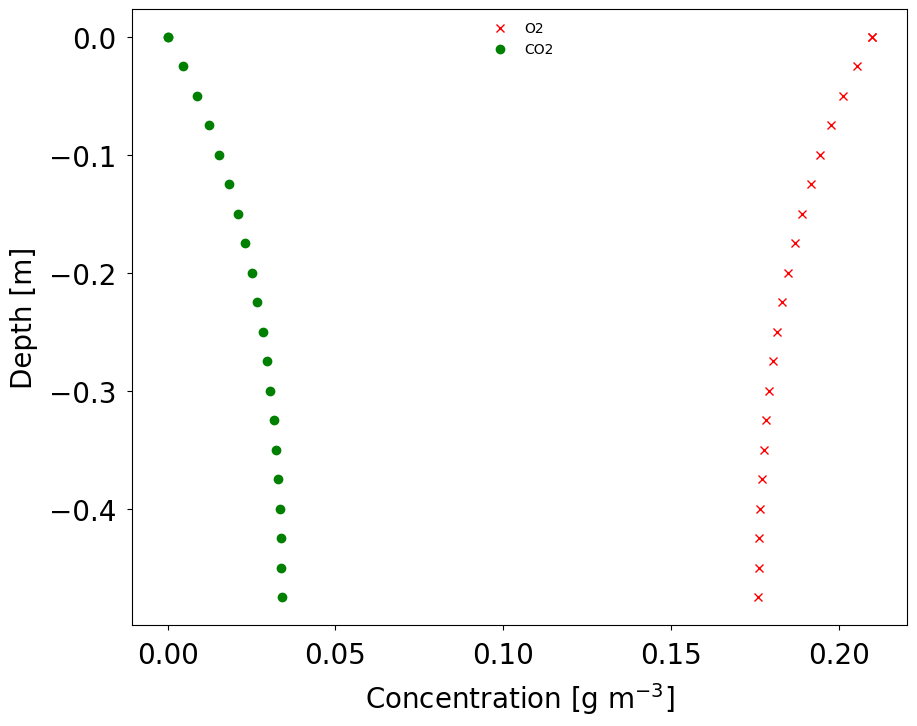

In [64]:
##Chapter_3.2

##Effects of volumetric water content, bulk density and boundary layer conductance on Oxygen and Carbon dioxide cocentrations in the soil profile.

#Note: Changing the bulk density from 1200 to 1090 kg/m3 (everyting is constant besides Db) will increase the gas-filled porosity from 0.35 to 0.39 cm3/cm3. In this scenario, the lines become steeper, with smaller change in O and CO2 concentrations with depth.
#Note: Changing the water content from 0.2 to 0.31 kg/m3 (everyting is constant besides water content) will reduce the gas-filled porosity from 0.35 to 0.24 cm3/cm3. In this scenario, especially in the surface, there is relatively huge drop in the O2 and increase in the CO2 contents with depth.
#Note: Changing the boundary layer conductance from 0.01 to 0.001 (everyting is constant besides the boundary layer conducatnce)will hardly change the gas-filled porosity as well as the O and CO2 concentrations with depth.


from math import exp
from PSP_ThomasAlgorithm import ThomasBoundaryCondition
import PSP_grid as grid
import matplotlib.pyplot as plt
import numpy as np

def gasSolver(boundaryLayerCond, boundaryConc_O2, dg_O2, 
                                respRate, totalDepth, n):
    a  = np.zeros(n+2, float)  
    b  = np.zeros(n+2, float)  
    c  = np.zeros(n+2, float)  
    d  = np.zeros(n+2, float) 
    g  = np.zeros(n+2, float) 
    u  = np.zeros(n+2, float)  
    co = np.zeros(n+2, float)  
    
    g[0] = boundaryLayerCond
    co[0] = boundaryConc_O2
    # vector depth [m]
    z = grid.linear(n, totalDepth)
    
    # initialize matrix
    for i in range(1, n+1):
        u[i] = respRate * exp(-z[i] / 0.3) * (z[i + 1] - z[i - 1]) / 2.0
        if i < n:
            g[i] = dg_O2 / (z[i + 1] - z[i])
        else:
            g[i] = 0
        a[i + 1] = -g[i]
        b[i] = g[i - 1] + g[i]
        c[i] = -g[i]
        d[i] = u[i]

    d[1] = d[1] + g[0] * co[0]
    
    ThomasBoundaryCondition(a, b, c, d, co, 1, n)
    
    return(z, co)


def main():
    R = 8.3143                     
    n = 20                        
    totalDepth = 0.5               
    bulkDensity = 1090.            #changed from 1200 to 1090 kg/m3           
    particleDensity = 2650.         
    waterContent = 0.31            #changed from 0.2 to 0.31             
    respRate = -0.001               
    oxygenDiff = 1.77e-5           #changed from 1.39e-5 to 1.77e-5 for O2 
    temperature = 25.             
    atmPressure = 101.3           
    boundaryLayerCond = 0.001      #changed from 0.01 to 0.001
    volumeFrac_O2 = 0.21           #defined
    bg = 0.9                       #constant value ranging from 0.5-1.0 and depends on the value chosen for mg (can be seen in table 3.2.)
    mg = 2.3                       #constant value ranging from 1-2 depending on the shape of the soil particles (can be seen in table 3.2.)   
    
    porosity = 1. - bulkDensity / particleDensity
    gasPorosity = porosity - waterContent


 # O2 concentration in air [g/m^3]
    boundaryConc_O2 = (volumeFrac_O2 * atmPressure * 1000. * 32. /            #equation 3.15
                          (R * (temperature + 273.15))) 
    
 # O2 binary diffusion coefficient [m2/s]
    binaryDiffCoeff_O2 = (oxygenDiff * (101.3 / atmPressure)                  #equation 3.13
                * ((temperature + 273.15) / 273.15)**1.75)
    
    dg_O2 = binaryDiffCoeff_O2 * bg * gasPorosity**mg                         #equation 3.14
    
    z, co = gasSolver(boundaryLayerCond, boundaryConc_O2, 
                      dg_O2, respRate, totalDepth, n)
    
    po = co * R * (temperature + 273.15) / (atmPressure * 1000. * 32.)        #partial pressure of O2
                           
    pco2 = 0.21 - po                                                          #partial pressure of CO2 assuming recipirocal relationship
      
    print ("node   depth [m]   Po2  Pco2")
    for i in range(n + 2):
        print ("%3d    %6.2f      %.3f       %.3f" %(i, z[i], po[i], pco2[i]))

    print ("gas-filled porosity (cm3/cm3)")
    print("%.2f" %(gasPorosity))
    
    # plot results
    fig = plt.figure(figsize=(10,8))
    for i in range(n+1):
        plt.plot(po[i], -z[i], 'rx', pco2[i], -z[i], 'go')
    plt.legend(['O2', 'CO2'], loc="upper center", frameon = False)  
    plt.xlabel('Concentration [g m$^{-3}$]',fontsize=20,labelpad=8)
    plt.ylabel('Depth [m]',fontsize=20,labelpad=8)
    plt.tick_params(axis='both', which='major', labelsize=20,pad=8)
    plt.tick_params(axis='both', which='minor', labelsize=20,pad=8)
    plt.show()
main()

node   depth [m]   Po2  Pco2
  0      0.00      0.210       0.000
  1      0.00      0.210       0.000
  2      0.03      0.205       0.005
  3      0.05      0.201       0.009
  4      0.08      0.198       0.012
  5      0.10      0.195       0.015
  6      0.12      0.192       0.018
  7      0.15      0.189       0.021
  8      0.17      0.187       0.023
  9      0.20      0.185       0.025
 10      0.22      0.183       0.027
 11      0.25      0.182       0.028
 12      0.27      0.180       0.030
 13      0.30      0.179       0.031
 14      0.33      0.178       0.032
 15      0.35      0.178       0.032
 16      0.38      0.177       0.033
 17      0.40      0.177       0.033
 18      0.43      0.176       0.034
 19      0.45      0.176       0.034
 20      0.48      0.176       0.034
 21      0.50      0.000       0.210
gas-filled porosity (cm3/cm3)
0.28


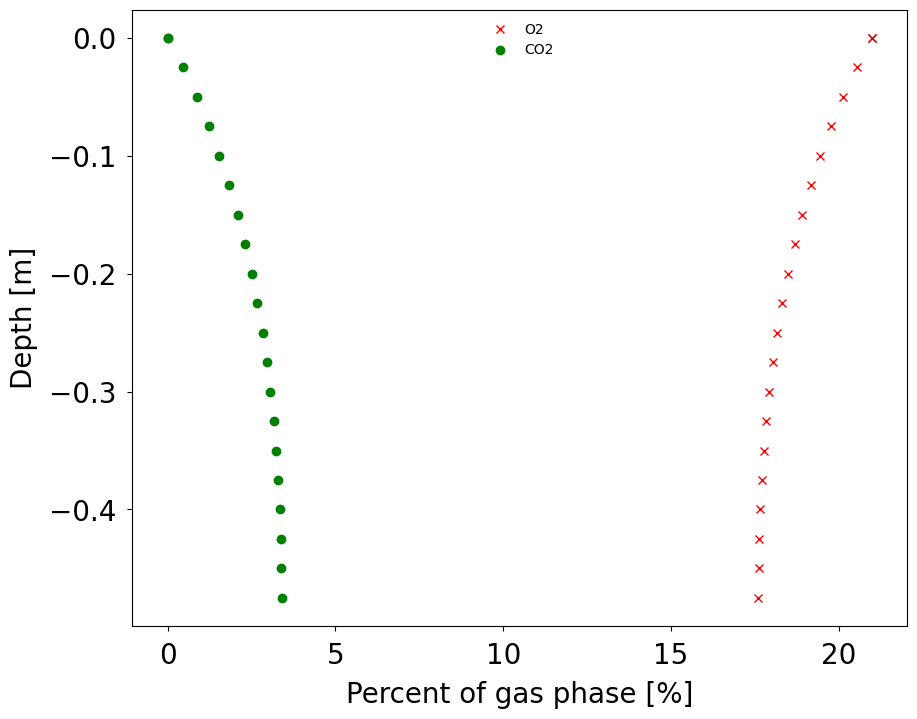

In [52]:
##Chapter_3.3.

##Percent Oxygen and Carbon dioxide contents with depth

#Percent O2 and CO2 were kept below 5% and above 15%, respectively. This was done by adjusting the volumetric water content of the soil (See figure below).
#Note: I am using the changed values (i.e., for bulk density, water content,and boundary layer conductance)I used in problem 2 in chapter 3. 

from math import exp
from PSP_ThomasAlgorithm import ThomasBoundaryCondition
import PSP_grid as grid
import matplotlib.pyplot as plt
import numpy as np

def gasSolver(boundaryLayerCond, boundaryConc_O2, dg_O2, 
                                respRate, totalDepth, n):
    a  = np.zeros(n+2, float)  
    b  = np.zeros(n+2, float)  
    c  = np.zeros(n+2, float)  
    d  = np.zeros(n+2, float) 
    g  = np.zeros(n+2, float) 
    u  = np.zeros(n+2, float)  
    co = np.zeros(n+2, float)  
    
    g[0] = boundaryLayerCond
    co[0] = boundaryConc_O2
    # vector depth [m]
    z = grid.linear(n, totalDepth)
    
    # initialize matrix
    for i in range(1, n+1):
        u[i] = respRate * exp(-z[i] / 0.3) * (z[i + 1] - z[i - 1]) / 2.0
        if i < n:
            g[i] = dg_O2 / (z[i + 1] - z[i])
        else:
            g[i] = 0
        a[i + 1] = -g[i]
        b[i] = g[i - 1] + g[i]
        c[i] = -g[i]
        d[i] = u[i]

    d[1] = d[1] + g[0] * co[0]
    
    ThomasBoundaryCondition(a, b, c, d, co, 1, n)
    
    return(z, co)


def main():
    R = 8.3143                     
    n = 20                        
    totalDepth = 0.5               
    bulkDensity = 1090.            #changed from 1200 to 1090 kg/m3           
    particleDensity = 2650.         
    waterContent = 0.31            #changed from 0.2 to 0.31             
    respRate = -0.001               
    oxygenDiff = 1.77e-5           #changed from 1.39e-5 to 1.77e-5 for O2 
    temperature = 25.             
    atmPressure = 101.3           
    boundaryLayerCond = 0.001      #changed from 0.01 to 0.001
    volumeFrac_O2 = 0.21           #defined
    bg = 0.9                       #constant value ranging from 0.5-1.0 and depends on the value chosen for mg (can be seen in table 3.2.)
    mg = 2.3                       #constant value ranging from 1-2 depending on the shape of the soil particles (can be seen in table 3.2.)   
    
    porosity = 1. - bulkDensity / particleDensity
    gasPorosity = porosity - waterContent


 # O2 concentration in air [g/m^3]
    boundaryConc_O2 = (volumeFrac_O2 * atmPressure * 1000. * 32. /            #equation 3.15
                          (R * (temperature + 273.15))) 
    
 # O2 binary diffusion coefficient [m2/s]
    binaryDiffCoeff_O2 = (oxygenDiff * (101.3 / atmPressure)                  #equation 3.13
                * ((temperature + 273.15) / 273.15)**1.75)
    
    dg_O2 = binaryDiffCoeff_O2 * bg * gasPorosity**mg                         #equation 3.14
    
    z, co = gasSolver(boundaryLayerCond, boundaryConc_O2, 
                      dg_O2, respRate, totalDepth, n)
    
    po = co * R * (temperature + 273.15) / (atmPressure * 1000. * 32.)        #partial pressure of O2
                           
    pco2 = 0.21 - po                                                          #partial pressure of CO2 assuming recipirocal relationship
      
    print ("node   depth [m]   Po2  Pco2")
    for i in range(n + 2):
        print ("%3d    %6.2f      %.3f       %.3f" %(i, z[i], po[i], pco2[i]))

    print ("gas-filled porosity (cm3/cm3)")
    print("%.2f" %(gasPorosity))
    
    # plot results
    fig = plt.figure(figsize=(10,8))
    for i in range(n+1):
        plt.plot(100*po[i], -z[i], 'rx', 100*pco2[i], -z[i], 'go')
    plt.legend(['O2', 'CO2'], loc="upper center", frameon = False)  
    plt.xlabel('Percent of gas phase [%]',fontsize=20,labelpad=8)
    plt.ylabel('Depth [m]',fontsize=20,labelpad=8)
    plt.tick_params(axis='both', which='major', labelsize=20,pad=8)
    plt.tick_params(axis='both', which='minor', labelsize=20,pad=8)
    plt.show()
main()